In [1]:
import sys
sys.executable

'/Users/edwardterrell/opt/anaconda3/envs/c_scrape2/bin/python'

In [3]:
from shapely.geometry import Point, Polygon
import pandas as pd
import geopandas as gpd
from zipfile import ZipFile
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

from pathlib import Path
from tools import tree


In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
dt.today()
today

datetime.datetime(2020, 7, 4, 14, 41, 43, 815)

'04-Jul-20'

In [6]:
p1 = Point(0,0)
print(p1)

POINT (0 0)


In [7]:
type(p1)

shapely.geometry.point.Point

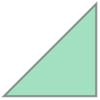

In [8]:
polygon = Polygon([(0,0),(1,1),(1,0)])
polygon

In [39]:
pwd

'/Users/edwardterrell/Desktop/Training/geospatial-public-policy-analysis-with-geopandas/notebooks'

In [16]:
ls ../data/external #inside data/external are the zip files

4-8-2020---748.zip     tl_2019_us_county.zip


In [18]:
with ZipFile('../data/external/tl_2019_us_county.zip', 'r') as zip:
    zip.printdir()

File Name                                             Modified             Size
tl_2019_us_county.cpg                          2019-08-02 01:18:34            5
tl_2019_us_county.dbf                          2019-08-02 01:18:48       947847
tl_2019_us_county.prj                          2019-08-02 01:18:34          165
tl_2019_us_county.shp                          2019-08-02 01:18:48    127354224
tl_2019_us_county.shp.ea.iso.xml               2019-08-02 01:19:00        41430
tl_2019_us_county.shp.iso.xml                  2019-08-02 01:19:00        39225
tl_2019_us_county.shx                          2019-08-02 01:18:48        25964


In [19]:
with ZipFile('../data/external/4-8-2020---748.zip', 'r') as zip:
    zip.printdir()

File Name                                             Modified             Size
Data_4-8-2020---748.csv                        2020-04-08 21:10:18       816494
ValueLabels_4-8-2020---748.csv                 2020-04-08 21:10:18         3195


In [20]:
z = ZipFile('../data/external/4-8-2020---748.zip')
data = pd.read_csv(z.open("Data_4-8-2020---748.csv"))
data.head(3)

,UnitID,Institution Name,FIPS state code (HD2018),Sector of institution (HD2018),Institutional category (HD2018),Street address or post office box (HD2018),Institution name alias (HD2018),Institution (entity) name (HD2018),Longitude location of institution (HD2018),Latitude location of institution (HD2018),...,Graduation rate - Bachelor degree within 6 years Native Hawaiian or Other Pacific Islander (DRVGR2018),Graduation rate - Bachelor degree within 6 years Black non-Hispanic (DRVGR2018),Graduation rate - Bachelor degree within 6 years Hispanic (DRVGR2018),Graduation rate - Bachelor degree within 6 years White non-Hispanic (DRVGR2018),Graduation rate - Bachelor degree within 6 years two or more races (DRVGR2018),Graduation rate - Bachelor degree within 6 years Nonresident alien (DRVGR2018),Graduation rate - Bachelor degree within 6 years Race/ethnicity unknown (DRVGR2018),Pell Grant recipients - Overall graduation rate within 150 percent of normal time (DRVGR2018),Pell Grant recipients - Bachelor's degree rate within 6 years (DRVGR2018),Unnamed: 49
0,180203,Aaniiih Nakoda College,30,4,4,269 Blackfeet Avenue Agency,,Aaniiih Nakoda College,-108.757816,48.484196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,222178,Abilene Christian University,48,2,2,,,Abilene Christian University,-99.709797,32.468943,...,NaN,53.0,52.0,72.0,61.0,79.0,NaN,53.0,53.0,NaN
2,138558,Abraham Baldwin Agricultural College,13,1,3,2802 Moore Hwy,ABAC,Abraham Baldwin Agricultural College,-83.528281,31.481889,...,NaN,43.0,0.0,23.0,NaN,100.0,NaN,18.0,22.0,NaN


In [21]:
value_labels = pd.read_csv(z.open("ValueLabels_4-8-2020---748.csv"))
value_labels

,VariableName,Value,ValueLabel
0,FIPS state code (HD2018),1,Alabama
1,FIPS state code (HD2018),2,Alaska
2,FIPS state code (HD2018),4,Arizona
3,FIPS state code (HD2018),5,Arkansas
4,FIPS state code (HD2018),6,California
...,...,...,...
59,Tribal college (HD2018),1,Yes
60,Tribal college (HD2018),2,No
61,Institutional category (HD2018),2,"Degree-granting, primarily baccalaureate or above"
62,Institutional category (HD2018),3,"Degree-granting, not primarily baccalaureate o..."


In [22]:
# Clean empty column
data.drop(columns=["Unnamed: 49"], inplace=True)

In [43]:
# Adding value labels to dataframe
labels = {}
var_names = value_labels["VariableName"].unique()

for var in var_names:
    mask = value_labels["VariableName"] == var
    working_df = value_labels[mask].copy()

    labels[var] = {}
    for row in working_df.itertuples():
        labels[var][row.Value] = row.ValueLabel

for key in labels.keys():
    data[key] = data[key].map(labels[key])

In [45]:
# Example code for the two '.py' cleaning programs (this one is geodata_cleaning)
def main():
    """Extracts zipped files into geodata/ folder in data/processed.
    """

    THIS_DIR = Path(__file__).parent
    DATA_DIR = THIS_DIR.joinpath("../../data/")

    RAW_ZIPPED_DATA = DATA_DIR.joinpath("./external/tl_2019_us_county.zip")
    PROCESSED_DATA = DATA_DIR.joinpath("./processed/")

    z = ZipFile(RAW_ZIPPED_DATA)

    z.filelist

    PROCESSED_DATA.joinpath("geodata/").mkdir()

    z.extractall(PROCESSED_DATA / 'geodata')

    return None

if __name__ == "__main__":
    main()

NameError: name '__file__' is not defined

### Start of talk

In [23]:
%whos

Variable           Type             Data/Info
---------------------------------------------
HTML               type             <class 'IPython.core.display.HTML'>
InteractiveShell   MetaHasTraits    <class 'IPython.core.inte<...>eshell.InteractiveShell'>
Path               type             <class 'pathlib.Path'>
Point              type             <class 'shapely.geometry.point.Point'>
Polygon            type             <class 'shapely.geometry.polygon.Polygon'>
ZipFile            type             <class 'zipfile.ZipFile'>
css                str              body {\n    margin: 0;\n <...>n    padding: 0.5em;\n}\n
data               DataFrame              UnitID             <...>n[3751 rows x 49 columns]
dt                 type             <class 'datetime.datetime'>
gpd                module           <module 'geopandas' from <...>s/geopandas/__init__.py'>
p1                 Point            POINT (0 0)
pd                 module           <module 'pandas' from '/U<...>ages/pandas/__i

In [ ]:
# you need to run the two python files: data_cleaning.py and geodata_cleaning.py
# i ran them in the src/data directory where they were located

In [24]:
pwd

'/Users/edwardterrell/Desktop/Training/geospatial-public-policy-analysis-with-geopandas/notebooks'

In [25]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/intermin/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [26]:
tree(EXTERNAL_DATA)

+ ../data/external
    + 4-8-2020---748.zip
    + tl_2019_us_county.zip


In [27]:
tree(PROCESSED_DATA)

+ ../data/processed
        + processed_data-checkpoint.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutions_data.csv
    + processed_data.csv


In [28]:
df = pd.read_csv(PROCESSED_DATA/'processed_data.csv')
df.head(3)

,unitid,institution_name,fips_state_code,sector,institutional_category,street_address,institution_name_alias,institution_name.1,longitude,latitude,...,gradrate_bachelor_degree_6_years_asian,gradrate_bachelor_degree_6_years_native_hawaiian_or_other_pacific_islander,gradrate_bachelor_degree_6_years_black_non-hispanic,gradrate_bachelor_degree_6_years_hispanic,gradrate_bachelor_degree_6_years_white_non-hispanic,gradrate_bachelor_degree_6_years_multirace,gradrate_bachelor_degree_6_years_nonresident_alien,gradrate_bachelor_degree_6_years_race-ethnicity_unknown,pell_grant_recipients_overall_gradrate_150_percent_normal_time,pell_grant_recipients_bachelor_degree_rate_6_years
0,180203,Aaniiih Nakoda College,Montana,"Public, 2-year","Degree-granting, associate's and certificates ...",269 Blackfeet Avenue Agency,,Aaniiih Nakoda College,-108.757816,48.484196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,222178,Abilene Christian University,Texas,"Private not-for-profit, 4-year or above","Degree-granting, primarily baccalaureate or above",,,Abilene Christian University,-99.709797,32.468943,...,14.0,NaN,53.0,52.0,72.0,61.0,79.0,NaN,53.0,53.0
2,138558,Abraham Baldwin Agricultural College,Georgia,"Public, 4-year or above","Degree-granting, not primarily baccalaureate o...",2802 Moore Hwy,ABAC,Abraham Baldwin Agricultural College,-83.528281,31.481889,...,0.0,NaN,43.0,0.0,23.0,NaN,100.0,NaN,18.0,22.0


In [29]:
df.head().T

,0,1,2,3,4
unitid,180203,222178,138558,488031,172866
institution_name,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
fips_state_code,Montana,Texas,Georgia,California,Minnesota
sector,"Public, 2-year","Private not-for-profit, 4-year or above","Public, 4-year or above","Private for-profit, 4-year or above","Private for-profit, 4-year or above"
institutional_category,"Degree-granting, associate's and certificates ...","Degree-granting, primarily baccalaureate or above","Degree-granting, not primarily baccalaureate o...","Degree-granting, primarily baccalaureate or above","Degree-granting, not primarily baccalaureate o..."
street_address,269 Blackfeet Avenue Agency,,2802 Moore Hwy,100 West Broadway Suite 600,1600 W. 82nd Street Suite 100
institution_name_alias,,,ABAC,,
institution_name.1,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
longitude,-108.758,-99.7098,-83.5283,-118.257,-93.2998
latitude,48.4842,32.4689,31.4819,34.1463,44.8557


In [30]:
df.columns

Index(['unitid', 'institution_name', 'fips_state_code', 'sector',
       'institutional_category', 'street_address', 'institution_name_alias',
       'institution_name.1', 'longitude', 'latitude',
       'historically_black_college_or_university', 'tribal_college',
       'percent_admitted_total', 'percent_admitted_women',
       'percent_admitted_men',
       'percent_total_enrollment_american_indian_or_alaska_native',
       'percent_total_enrollment_asian-native_hawaiian-pacific_islander',
       'percent_total_enrollment_asian',
       'percent_total_enrollment_native_hawaiian_or_other_pacific_islander',
       'percent_total_enrollment_black_or_african_american',
       'percent_total_enrollment_hispanic-latino',
       'percent_total_enrollment_white',
       'percent_total_enrollment_race-ethnicity_unknown',
       'percent_total_enrollment_nonresident_alien',
       'percent_total_enrollment_multirace', 'percent_total_enrollment_women',
       'total_enrollment', 'full-time_enr

In [31]:
cols =['institution_name', 
       'fips_state_code', 
       'sector',
       'longitude', 
       'latitude',
       'total_enrollment', 
       'full-time_enrollment', 
       'part-time_enrollment',
       ]

In [32]:
working_df = df[cols].copy()
working_df

,institution_name,fips_state_code,sector,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment
0,Aaniiih Nakoda College,Montana,"Public, 2-year",-108.757816,48.484196,150.0,108.0,42.0
1,Abilene Christian University,Texas,"Private not-for-profit, 4-year or above",-99.709797,32.468943,5204.0,3730.0,1474.0
2,Abraham Baldwin Agricultural College,Georgia,"Public, 4-year or above",-83.528281,31.481889,4291.0,2660.0,1631.0
3,Abraham Lincoln University,California,"Private for-profit, 4-year or above",-118.256726,34.146294,217.0,194.0,23.0
4,Academy College,Minnesota,"Private for-profit, 4-year or above",-93.299809,44.855722,99.0,81.0,18.0
...,...,...,...,...,...,...,...,...
3746,Youngstown State University,Ohio,"Public, 4-year or above",-80.646590,41.104928,12607.0,9687.0,2920.0
3747,YTI Career Institute-Altoona,Pennsylvania,"Private for-profit, 2-year",-78.395445,40.485390,39.0,39.0,0.0
3748,YTI Career Institute-York,Pennsylvania,"Private for-profit, 2-year",-76.660321,39.992432,1327.0,1327.0,0.0
3749,Yuba College,California,"Public, 2-year",-121.539640,39.126536,5934.0,2288.0,3646.0


In [33]:
working_df['sector'].unique()

array(['Public, 2-year', 'Private not-for-profit, 4-year or above',
       'Public, 4-year or above', 'Private for-profit, 4-year or above',
       'Private not-for-profit, 2-year', 'Private for-profit, 2-year'],
      dtype=object)

In [34]:
# Pandas creates a new dataframe
working_df['sector'].str.split(', ',expand = True)

,0,1
0,Public,2-year
1,Private not-for-profit,4-year or above
2,Public,4-year or above
3,Private for-profit,4-year or above
4,Private for-profit,4-year or above
...,...,...
3746,Public,4-year or above
3747,Private for-profit,2-year
3748,Private for-profit,2-year
3749,Public,2-year


In [35]:
working_df['control'] = working_df['sector'].str.split(', ',expand = True)[0]
working_df['level'] = working_df['sector'].str.split(', ',expand = True)[1]
working_df.head(3)

,institution_name,fips_state_code,sector,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,"Public, 2-year",-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,"Private not-for-profit, 4-year or above",-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,"Public, 4-year or above",-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above


In [36]:
working_df.drop(columns = 'sector', inplace = True)

# Checkpoint

In [37]:
working_df.to_csv(PROCESSED_DATA.joinpath('institutions_data.csv'), index=False, encoding = 'utf-8')

In [38]:
pwd

'/Users/edwardterrell/Desktop/Training/geospatial-public-policy-analysis-with-geopandas/notebooks'